## Movie reviews classification
The labeled dataset consists of 50,000 IMDB movie reviews, specially selected for sentiment analysis. 

* The IMDB rating < 5: 0 
* The IMDB rating >=7: 1

No individual movie has more than 30 reviews. The 25,000 reviews labeled training set does not include any of the same movies as the 25,000 review test set.



In [28]:
import pandas as pd
import numpy as np
import seaborn as sns

In [51]:
review = pd.read_csv('~/Documents/ml/Sentiment Analysis/labeledTrainData.tsv',sep='\t')

In [65]:
print(review.shape)
review.sample(10)


(25000, 3)


,id,sentiment,review
3625,8616_8,1,What if a platoon of G.I.'s from the Japanese ...
20016,8561_3,0,The Cowboys could leave you a little sore in t...
12737,94_10,1,I am a huge John Denver fan. I have a large co...
20851,12313_10,1,For long time I haven't seen such a good fanta...
9020,8424_9,1,That's My Bush is a live action project made b...
10723,7363_4,0,"The only reason I saw \Shakedown\"" was that it..."
16671,4196_9,1,This crime thriller is sort of like a film noi...
12100,9298_9,1,"Simply, one of the funiest movies i've ever se..."
24719,6227_7,1,Definitely one of the lesser of the Astaire/Ro...
14005,3596_2,0,"To be as honest as I possibly can, The Devil's..."


### How many movies are rating good and bad in the training data set?

1    12500
0    12500
Name: sentiment, dtype: int64


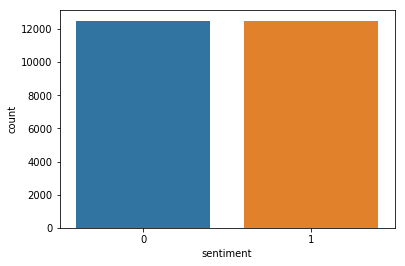

In [35]:
sns.countplot(x='sentiment',data=review)
print(review.sentiment.value_counts())

There 25000 observation which splitted equally between good and bad reviews

## Data clean up
Let's see top common word in our dataset

In [79]:
from collections import Counter

vocab = Counter()
for sentence in review['review']:
    for word in sentence.lower().split():
        vocab[word]+=1
print(vocab.most_common(30))        

[('the', 322198), ('a', 159949), ('and', 158572), ('of', 144462), ('to', 133967), ('is', 104170), ('in', 90527), ('i', 70480), ('this', 69711), ('that', 66292), ('it', 65495), ('/><br', 50935), ('was', 47024), ('as', 45102), ('for', 42843), ('with', 42729), ('but', 39764), ('on', 31618), ('movie', 30879), ('his', 29059), ('are', 28743), ('not', 28596), ('film', 27772), ('you', 27563), ('have', 27344), ('he', 26177), ('be', 25691), ('at', 22731), ('one', 22476), ('by', 21976)]


Look like there a lot of stop word and html markup in the review.
Let's try to remove them

### Removing stop words & html markup

##### Removing stop words

In [80]:
# import nltk
# nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')

vocab_reduced = Counter()

for key,value in vocab.items():
    if key not in stop:
        vocab_reduced[key]=value

print(vocab_reduced.most_common(30))        

[('/><br', 50935), ('movie', 30879), ('film', 27772), ('one', 22476), ('like', 18779), ('would', 12026), ('even', 12010), ('good', 11924), ('really', 11065), ('see', 10410), ('-', 9355), ('get', 8959), ('story', 8742), ('much', 8739), ('also', 8007), ('first', 7985), ('time', 7944), ('great', 7713), ('people', 7676), ('could', 7594), ('make', 7590), ('/>the', 7409), ('made', 7041), ('bad', 6816), ('think', 6773), ('many', 6388), ('never', 6319), ('two', 6209), ('little', 6122), ('well', 5854)]


##### Removing html markup

In [181]:
#Removing html markup, save and normalize emoticon
import re
def preprocessor(text):
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|d|p)', text)
    # Remove any non-word character and append the emoticons,
    # removing the nose character for standarization. Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

Let's check again to see if we can clear the html markup

In [86]:
new_vocab = Counter()
for sentence in review['review']:
    sentence = preprocessor(sentence)
    for word in sentence.lower().split():
        if word not in stop:
            new_vocab[word]+=1

In [90]:
print(new_vocab.most_common(100))

[('movie', 44029), ('film', 40144), ('one', 26788), ('like', 20274), ('good', 15140), ('time', 12723), ('even', 12645), ('would', 12436), ('story', 11981), ('really', 11735), ('see', 11475), ('well', 10661), ('much', 9763), ('get', 9309), ('bad', 9301), ('people', 9285), ('also', 9156), ('first', 9061), ('great', 9057), ('made', 8362), ('way', 8026), ('make', 8022), ('could', 7919), ('movies', 7663), ('think', 7295), ('characters', 7154), ('character', 7023), ('watch', 6971), ('two', 6905), ('films', 6887), ('seen', 6679), ('many', 6675), ('life', 6628), ('plot', 6585), ('acting', 6490), ('never', 6484), ('love', 6453), ('little', 6435), ('best', 6416), ('show', 6294), ('know', 6166), ('ever', 5989), ('man', 5979), ('better', 5737), ('end', 5648), ('still', 5622), ('say', 5395), ('scene', 5378), ('scenes', 5207), ('go', 5156), ('something', 5076), ('back', 4972), ('real', 4735), ('watching', 4602), ('though', 4566), ('old', 4525), ('thing', 4521), ('years', 4514), ('actors', 4486), ('d

The result look goods. One step need to be done. We must stem the word to its root form.

##### Stemming words

In [213]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def tokenizer_porter(text):
    text = re.sub('[., |;?!]',' ',text)
    words = text.split()
    return [porter.stem(word) for word in words]

Check the dictionary after stemming

In [212]:
new_vocab = Counter()
for sentence in review['review']:
    sentence = preprocessor(sentence)
    sentence = tokenizer_porter(sentence)
    for word in sentence:
        if word not in stop:
            new_vocab[word]+=1

SyntaxError: invalid syntax (<ipython-input-212-134fbdee5146>, line 5)

In [175]:
print(new_vocab.most_common(100))

[('thi', 75982), ('movi', 51694), ('wa', 48201), ('film', 48188), ('hi', 29426), ('one', 27741), ('like', 22799), ('ha', 16970), ('time', 16190), ('good', 15360), ('make', 15206), ('charact', 14178), ('get', 14140), ('see', 14111), ('veri', 14063), ('watch', 13938), ('stori', 13166), ('even', 12906), ('would', 12436), ('onli', 11915), ('realli', 11735), ('well', 11041), ('scene', 10586), ('look', 10051), ('show', 9877), ('much', 9763), ('end', 9651), ('peopl', 9391), ('bad', 9344), ('go', 9304), ('great', 9170), ('also', 9156), ('first', 9062), ('becaus', 9045), ('love', 9025), ('think', 8912), ('way', 8830), ('act', 8794), ('play', 8730), ('made', 8362), ('thing', 8209), ('could', 7919), ('ani', 7659), ('know', 7514), ('say', 7457), ('seem', 7220), ('work', 7101), ('plot', 6967), ('two', 6907), ('actor', 6876), ('year', 6874), ('come', 6747), ('mani', 6688), ('seen', 6681), ('take', 6654), ('life', 6640), ('want', 6639), ('never', 6484), ('littl', 6435), ('best', 6424), ('tri', 6356),

Looking great!!

## Training the model using Logistic Regression

In [178]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(review['review'],review['sentiment'],test_size = 0.3,random_state=13)

In [200]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import  TfidfVectorizer

tfidf = TfidfVectorizer(stop_words = stop, tokenizer = tokenizer_porter, preprocessor = preprocessor)
# tfidf = TfidfVectorizer(stop_words=stop,
#                         tokenizer=tokenizer_porter,
#                         preprocessor=preprocessor)

clf = Pipeline([('vect',tfidf),('clf',LogisticRegression(random_state=0))])

clf.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2',
        preprocessor=<function prepr...e, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [201]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

prediction = clf.predict(X_test)

print(accuracy_score(y_test,prediction))
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test, prediction))


0.8828
[[3170  506]
 [ 373 3451]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      3676
           1       0.87      0.90      0.89      3824

   micro avg       0.88      0.88      0.88      7500
   macro avg       0.88      0.88      0.88      7500
weighted avg       0.88      0.88      0.88      7500



We get an accuracy score of 88.3% which is better than just random guess from the dataset (50%)

Let's test again with some real recent reviews of Bumblebee and Aquaman on rottentomatoes.com and imdb.com

In [207]:
reviews = ["Finally a Transformers movie made by a true filmmaker and the franchise may finally ignite the series. The issue has always been Michael Bays style of humour and lack of direction for the characters. Knight on the other hand course corrects and provides a heartfelt connection to the series. The first 10 minutes are some of the most impressive action scenes of the series, relentless. It is a shame that audiences have neglected this, most likely due to the very poor Last Knight storyline. They have a chance to ignore the other movies in the franchise now and it is a good idea, the mythology of the characters was essentially destroyed by a director with little or no care for the franchise. I hope Knight returns in some form and Bay is sidelined for the future, think Snyder for the DC universe. This is a funny and at times heartfelt story, that services the fans and new fans at the same time. Great action and without the dumb jokes that plague the Transformers central series. 08/01/2019.'",
                "Whats not to love about Bumblebee? The bar of expectation has been set so low for the Transformers franchise, so much so that anything better than the mind-numbing robot fights of the past must be good. Some parts were cute, like Bumblebee smashing the settee he sat on and truly bumbling away, yet so unnecessary. The back story of Hailee Steinfeld's daddy issues was also a distraction and cringeworthy. I had more fun watching the kids in the cinema screaming with delight at every Decepticon - Autobot battle, crying out when Bumblebee got beaten up really bad, and laughing at Bumblebee s antics. Its really for the kids, and I think they deserved to enjoy this one.",
                "I think the movie is okay, but, the pacing is to messy, and there are to many cliches.",
               "I want to cry now ......last year after watching Justice League, I was depressed. My friend didn't say anything but I know she think DC films sucks. So I went to see Aquaman alone yesterday, for the first time in my life,everyone was applauding after the movie (Maybe because everyone who go to watch Aquaman premiere is a DC fan but when I was waiting for a taxi I heard a boy talking to his girlfriend that This Marvel movie is wonderful!!! lol) James Wan is AMAZING,Aquaman is very imaginative and it's nothing like any other superhero movie I've seen before, he knows what we want, BEST DCEU FILM (Yes I think it's much better than SS/JL/BVS/MOS/WW) I can't believe that Aquaman's net production cost is160m, much lower than JL(300m) BVS(250m )MOS(225m) even SS costs175m!!! WB should give James Wan more budget to direct Aquaman 2!!!! P.S. James says he may direct a horror-style Batman movie,pls WB let him do it!!!!",
          "I hate this movie."]


preds = clf.predict_proba(reviews)

In [214]:
for i in range(len(reviews)):
    print(f'{i} --> Negative, Positive = {preds[i]}')

0 --> Negative, Positive = [0.33022303 0.66977697]
1 --> Negative, Positive = [0.34540388 0.65459612]
2 --> Negative, Positive = [0.6323063 0.3676937]
3 --> Negative, Positive = [0.36611023 0.63388977]
4 --> Negative, Positive = [0.6126845 0.3873155]
